<a href="https://colab.research.google.com/github/agsuvidha/Python-Colabs/blob/main/C_St117.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
files_load=files.upload()

Saving heart.csv to heart.csv


In [ ]:
import pandas as pd
df=pd.read_csv("heart.csv")
print(df.head())

   age  sex  cp  trestbps  chol  fbs  ...  exang  oldpeak  slope  ca  thal  target
0   63    1   3       145   233    1  ...      0      2.3      0   0     1       1
1   37    1   2       130   250    0  ...      0      3.5      0   0     2       1
2   41    0   1       130   204    0  ...      0      1.4      2   0     2       1
3   56    1   1       120   236    0  ...      0      0.8      2   0     2       1
4   57    0   0       120   354    0  ...      1      0.6      2   0     2       1

[5 rows x 14 columns]


In [ ]:
from sklearn.model_selection import train_test_split

heart_attack=df['target']
factors=df[['age','sex','cp','chol','thalach']]
factors_train,factors_test,heart_attack_train,heart_atack_test=train_test_split(factors,heart_attack,test_size=0.25,random_state=0)

In [ ]:
from sklearn.preprocessing import StandardScaler
se_x=StandardScaler()
factors_train=se_x.fit_transform(factors_train)
factors_test=se_x.fit_transform(factors_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression(random_state=0)
classifier.fit(factors_train,heart_attack_train)

LogisticRegression(random_state=0)

In [ ]:
heart_attack_pred=classifier.predict(factors_test)
predict_values=[]
for i in heart_attack_pred:
  if i==0:
    predict_values.append('no')
  else:
    predict_values.append('yes')
actual_values=[]
for i in heart_atack_test.ravel():
  if i==0:
    actual_values.append('no')
  else:
    actual_values.append('yes')

[Text(0, 0.5, 'yes'), Text(0, 1.5, 'no')]

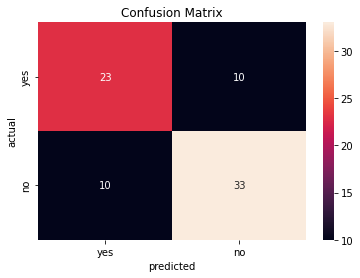

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns 
import matplotlib.pyplot as plt
cm=confusion_matrix(actual_values,predict_values)
ax=plt.subplot()
sns.heatmap(cm,annot=True,ax=ax)
ax.set_xlabel('predicted')
ax.set_ylabel('actual')
ax.set_title('Confusion Matrix')
labels=['yes','no']
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)